In [3]:
%reload_ext autoreload
%autoreload 2

In [51]:
from whatever.explanation import *
from whatever.harness import Harness
import bokeh, IPython, pandas
from sklearn import datasets, discriminant_analysis

In [52]:
c = bokeh.palettes.Inferno3

In [35]:
iris = datasets.load_iris()
clf = discriminant_analysis.LinearDiscriminantAnalysis()
clf.fit(iris['data'], iris['target'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [36]:
description = Describer()
decision = description.why(iris['data'], clf.predict(iris['data']))

decision.set_index(decision.index.map(iris['target_names'].__getitem__), inplace=True)
decision.feature = decision.feature.apply(iris['feature_names'].__getitem__)
decision

,feature,condition,threshold
setosa,petal length (cm),<,2.45
versicolor,petal length (cm),>,2.45
versicolor,petal width (cm),<,1.75
versicolor,petal length (cm),<,4.95
versicolor,petal width (cm),<,1.65
virginica,petal length (cm),>,2.45
virginica,petal width (cm),>,1.75


In [37]:
%mkdir html

mkdir: html: File exists


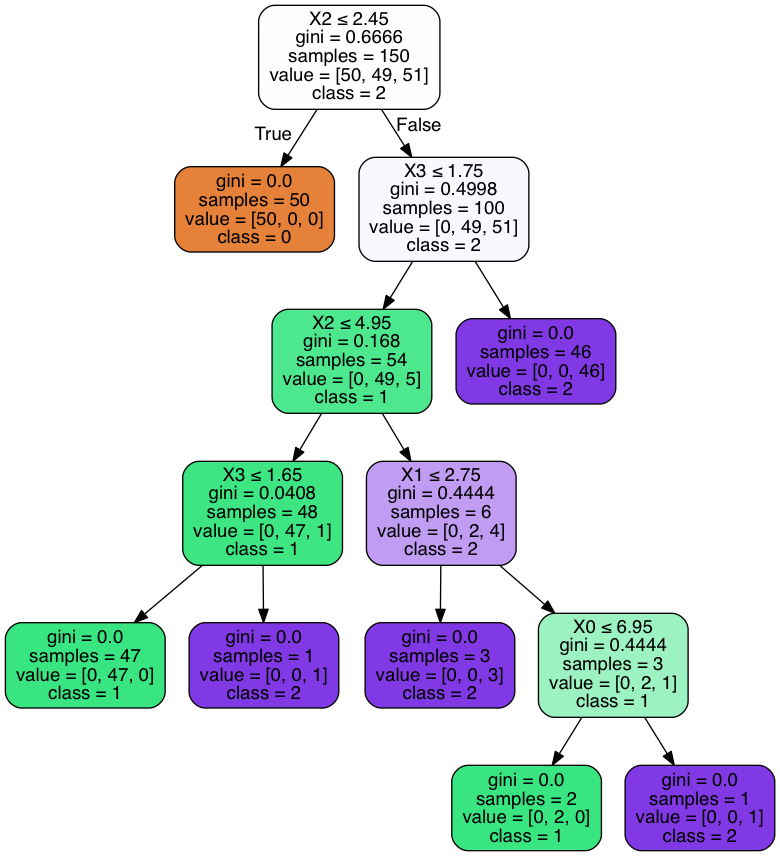

In [38]:
IPython.display.Image(nx_tree(description).create_png(), embed=True)

In [39]:
%matplotlib inline

In [42]:
df = Harness(iris['data'], iris['target'], columns=iris['feature_names'], estimator=clf)

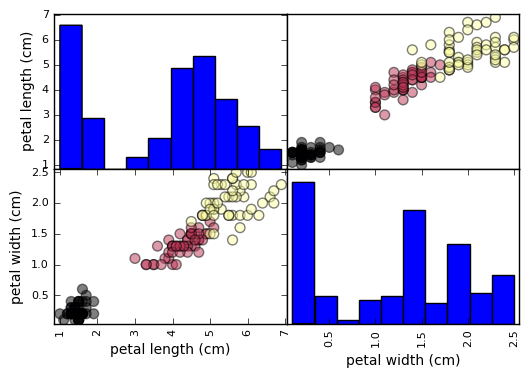

In [75]:
df[['petal length (cm)', 'petal width (cm)']].pipe(
    pandas.tools.plotting.scatter_matrix, s=200, 
    c=df.index.map(c.__getitem__).tolist(), edgecolor=None
);

In [78]:
bokeh.plotting.output_notebook(resources=bokeh.resourcesces.CDN)

Loading BokehJS ...

In [80]:
with df.transform().DataSource(x=0, y=1) as source:
    source.output_file('html/iris.html')
    source['fill_color'] = source.index.map(c.__getitem__)
    source.set_index(source.index.map(iris['target_names'].__getitem__), inplace=True)
    source.figure()
    source.ColumnDataSource().Circle(size=20, fill_alpha=.6)
    source.sample(20).ColumnDataSource().Text(text='index')
    source.show()